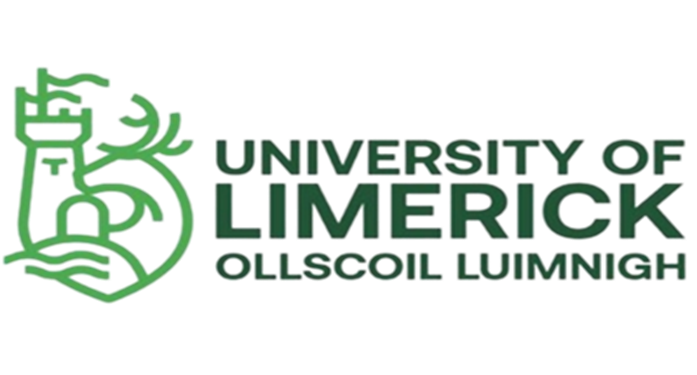

# Big Data Project
# Credit Card Fraud Detection
## University of Limerick, CS6502 - Applied Big Data and Vizualisations
### By - Group 11
### Taught By - Dr. Andrew Ju

## **Dataset Description**

This dataset offers a variety of attributes valuable for comprehensive analysis. It contains 555,719 instances and 22 attributes, a mix of categorical and numerical data types. Importantly, the dataset is complete with no null values. Here's a breakdown of the attributes:

- **Trans_date_trans_time**: Timestamp of the transaction (date and time).
- **Cc_num**: Unique customer identification number.
- **Merchant**: The merchant involved in the transaction.
- **Category**: Transaction type (e.g., personal, childcare).
- **Amt**: Transaction amount.
- **First**: Cardholder's first name.
- **Last**: Cardholder's last name.
- **Gender**: Cardholder's gender.
- **Street**: Cardholder's street address.
- **City**: Cardholder's city of residence.
- **State**: Cardholder's state of residence.
- **Zip**: Cardholder's zip code.
- **Lat**: Latitude of cardholder's location.
- **Long**: Longitude of cardholder's location.
- **City_pop**: Population of the cardholder's city.
- **Job**: Cardholder's job title.
- **Dob**: Cardholder's date of birth.
- **Trans_num**: Unique transaction identifier.
- **Unix_time**: Transaction timestamp (Unix format).
- **Merch_lat**: Merchant's location (latitude).
- **Merch_long**: Merchant's location (longitude).
- **Is_fraud**: Fraudulent transaction indicator (1 = fraud, 0 = legitimate). This is the target variable for classification purposes.

### Mounting Folder from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Install and Import Packages and Libraries for the Project
Creating a Spark Session

In [ ]:
!sudo apt update
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
#Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
!tar xf spark-3.2.1-bin-hadoop3.2.tgz
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


import findspark
findspark.init()
findspark.find()

import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
       .builder \
       .appName("Big Data Project") \
       .getOrCreate()

spark

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Get:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Get:4 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [812 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Get:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease [18.1 kB]
Get:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease [18.1 kB]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,077 kB]
Get:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease [23.8

In [ ]:
spark

## Loading the Dataset into codespace.

In [ ]:
dataset_path = "/content/drive/MyDrive/Colab Notebooks/Big Data Project/fraud_prediction_data.csv"

# Load dataset into a DataFrame
df = spark.read.csv(dataset_path, header=True, inferSchema=True)

## Exploratory Data Analysis


In [ ]:
# Display the first few rows of the DataFrame
df.show(5)

+---+---------------------+----------+--------------------+--------------+-----+------+--------+------+--------------------+----------+-----+-----+-------+--------+--------+--------------------+----------+--------------------+----------+---------+-----------+--------+
|_c0|trans_date_trans_time|    cc_num|            merchant|      category|  amt| first|    last|gender|              street|      city|state|  zip|    lat|    long|city_pop|                 job|       dob|           trans_num| unix_time|merch_lat| merch_long|is_fraud|
+---+---------------------+----------+--------------------+--------------+-----+------+--------+------+--------------------+----------+-----+-----+-------+--------+--------+--------------------+----------+--------------------+----------+---------+-----------+--------+
|  0|     21/06/2020 12:14|2.29116E15|fraud_Kirlin and ...| personal_care| 2.86|  Jeff| Elliott|     M|   351 Darlene Green|  Columbia|   SC|29209|33.9659|-80.9355|  333497| Mechanical engineer

In [ ]:
#Viewing the dataframe schema
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- trans_date_trans_time: string (nullable = true)
 |-- cc_num: double (nullable = true)
 |-- merchant: string (nullable = true)
 |-- category: string (nullable = true)
 |-- amt: double (nullable = true)
 |-- first: string (nullable = true)
 |-- last: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- street: string (nullable = true)
 |-- city: string (nullable = true)
 |-- state: string (nullable = true)
 |-- zip: integer (nullable = true)
 |-- lat: double (nullable = true)
 |-- long: double (nullable = true)
 |-- city_pop: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- dob: string (nullable = true)
 |-- trans_num: string (nullable = true)
 |-- unix_time: integer (nullable = true)
 |-- merch_lat: double (nullable = true)
 |-- merch_long: double (nullable = true)
 |-- is_fraud: integer (nullable = true)



In [ ]:
print("Number of rows: ", df.count())
print("Number of columns: ", len(df.columns))

Number of rows:  555719
Number of columns:  23


In [ ]:
df.describe().show()

+-------+-----------------+---------------------+--------------------+-------------------+-------------+-----------------+-------+------+------+--------------------+-------+------+------------------+-----------------+------------------+-----------------+------------------+----------+--------------------+--------------------+-----------------+------------------+--------------------+
|summary|              _c0|trans_date_trans_time|              cc_num|           merchant|     category|              amt|  first|  last|gender|              street|   city| state|               zip|              lat|              long|         city_pop|               job|       dob|           trans_num|           unix_time|        merch_lat|        merch_long|            is_fraud|
+-------+-----------------+---------------------+--------------------+-------------------+-------------+-----------------+-------+------+------+--------------------+-------+------+------------------+-----------------+-------------

In [ ]:
# Count missing values in each column

from pyspark.sql.functions import col, sum as spark_sum

missing_counts = df.select([spark_sum(col(c).isNull().cast("int")).alias(c) for c in df.columns])
missing_counts.show()

+---+---------------------+------+--------+--------+---+-----+----+------+------+----+-----+---+---+----+--------+---+---+---------+---------+---------+----------+--------+
|_c0|trans_date_trans_time|cc_num|merchant|category|amt|first|last|gender|street|city|state|zip|lat|long|city_pop|job|dob|trans_num|unix_time|merch_lat|merch_long|is_fraud|
+---+---------------------+------+--------+--------+---+-----+----+------+------+----+-----+---+---+----+--------+---+---+---------+---------+---------+----------+--------+
|  0|                    0|     0|       0|       0|  0|    0|   0|     0|     0|   0|    0|  0|  0|   0|       0|  0|  0|        0|        0|        0|         0|       0|
+---+---------------------+------+--------+--------+---+-----+----+------+------+----+-----+---+---+----+--------+---+---+---------+---------+---------+----------+--------+



In [ ]:
from pyspark.sql.functions import col

# Extract unique values from the 'Class' column
classification_values = df.select(col('is_fraud')).distinct().rdd.map(lambda row: row[0]).collect()

# Print the unique values
print(classification_values)

[1, 0]


In [ ]:
# Group by the 'Class' column and count occurrences
class_counts = df.groupBy('is_fraud').count()

# Convert the result to Pandas DataFrame for easy display (optional)
class_counts_df = class_counts.toPandas()

# Print the result
print(class_counts_df)

   is_fraud   count
0         1    2145
1         0  553574


In [ ]:
# Extract counts for class 1 and class 0
class_1_count = class_counts_df[class_counts_df['is_fraud'] == 1]['count'].values[0]
class_0_count = class_counts_df[class_counts_df['is_fraud'] == 0]['count'].values[0]

# Calculate ratios
class_1_ratio = class_1_count / df.count()
class_0_ratio = class_0_count / df.count()

# Print ratios
print("Ratio of class 1:", class_1_ratio)
print("Ratio of class 0:", class_0_ratio)

Ratio of class 1: 0.0038598644278853163
Ratio of class 0: 0.9961401355721147


The dataset has an imbalance with 99.6% Non Frauds and 0.4% Frauds.

In [ ]:
numerical_columns = [col_name for col_name, col_type in df.dtypes if col_type in ['int', 'float', 'double']]

# Print numerical columns
print(numerical_columns)

['_c0', 'cc_num', 'amt', 'zip', 'lat', 'long', 'city_pop', 'unix_time', 'merch_lat', 'merch_long', 'is_fraud']


In [ ]:
all_columns_numerical = len(numerical_columns) == len(df.columns)
print(all_columns_numerical)

False


There are categorical columns as well as numerical columns.

<Figure size 800x600 with 0 Axes>

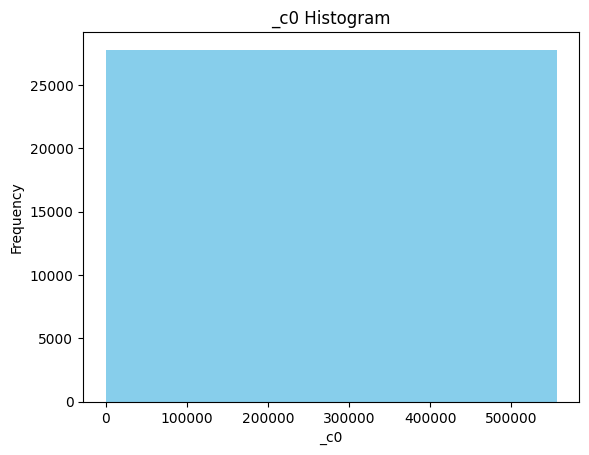

<Figure size 800x600 with 0 Axes>

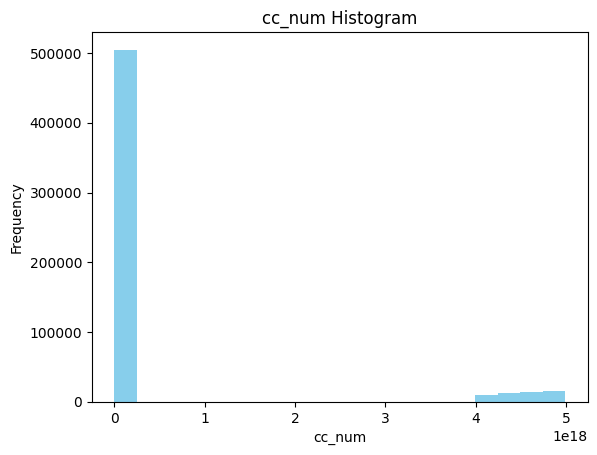

<Figure size 800x600 with 0 Axes>

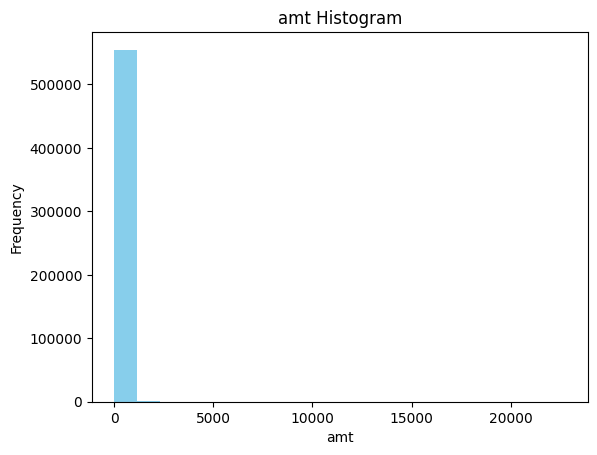

<Figure size 800x600 with 0 Axes>

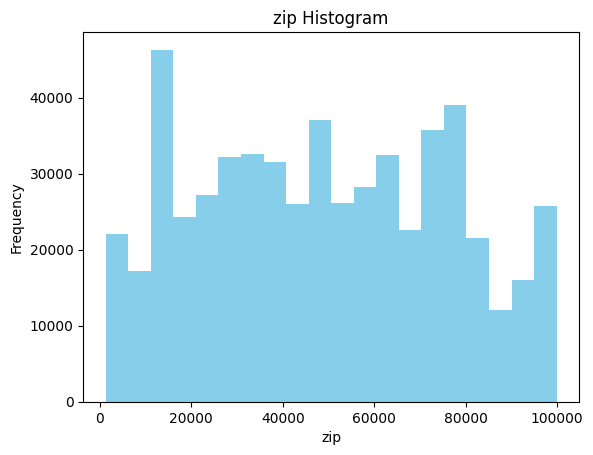

<Figure size 800x600 with 0 Axes>

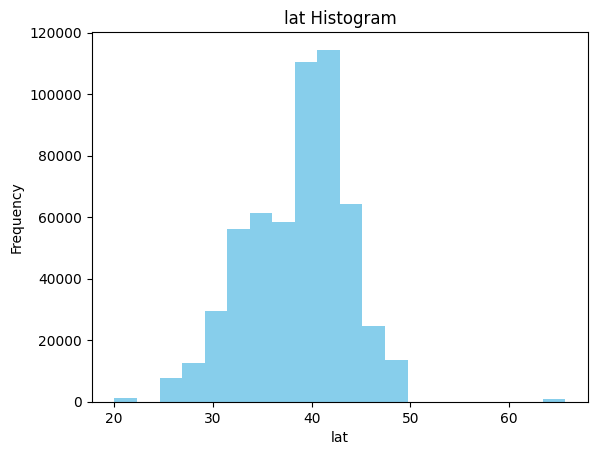

<Figure size 800x600 with 0 Axes>

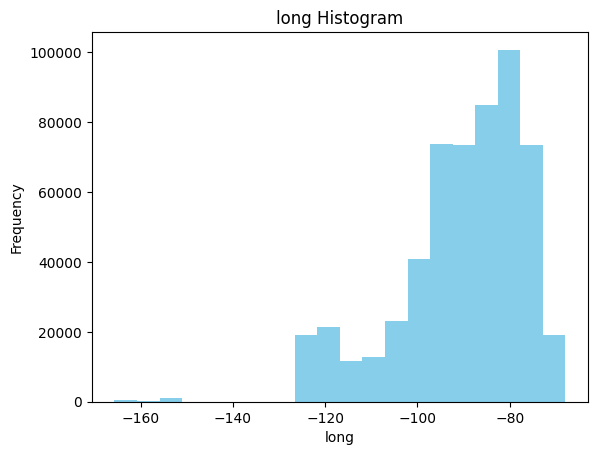

<Figure size 800x600 with 0 Axes>

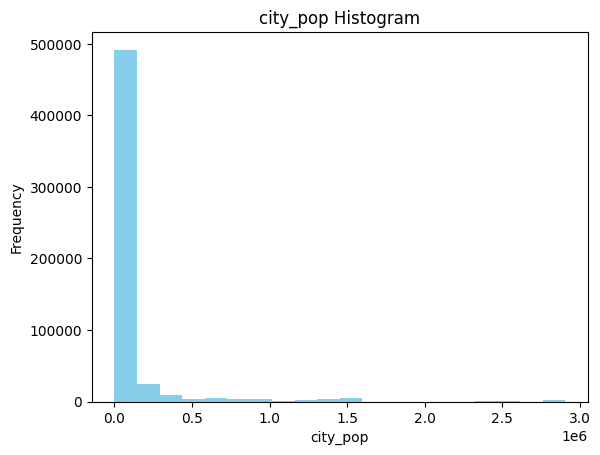

<Figure size 800x600 with 0 Axes>

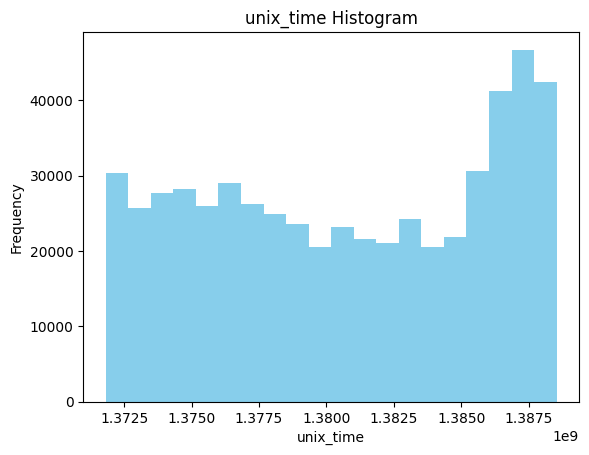

<Figure size 800x600 with 0 Axes>

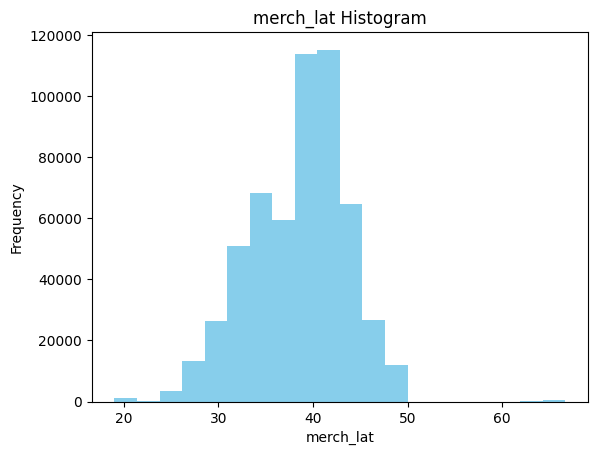

<Figure size 800x600 with 0 Axes>

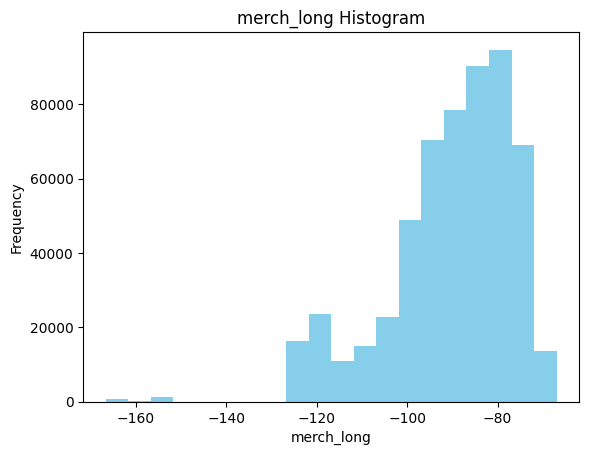

<Figure size 800x600 with 0 Axes>

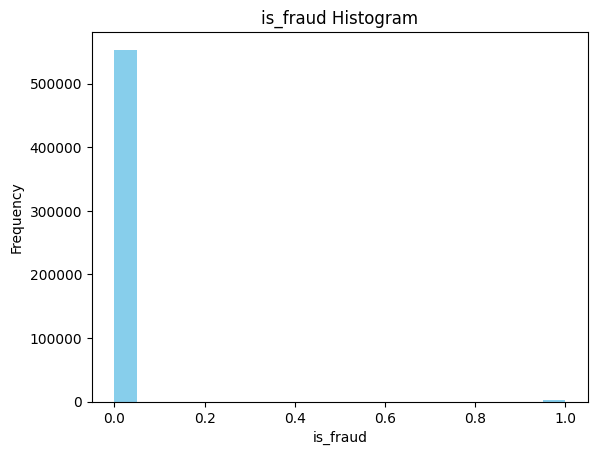

In [ ]:
import matplotlib.pyplot as plt

# Iterate over numerical columns and plot histograms
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    df.select(col).toPandas().hist(bins=20, grid=False, color='skyblue')
    plt.title(col + " Histogram")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

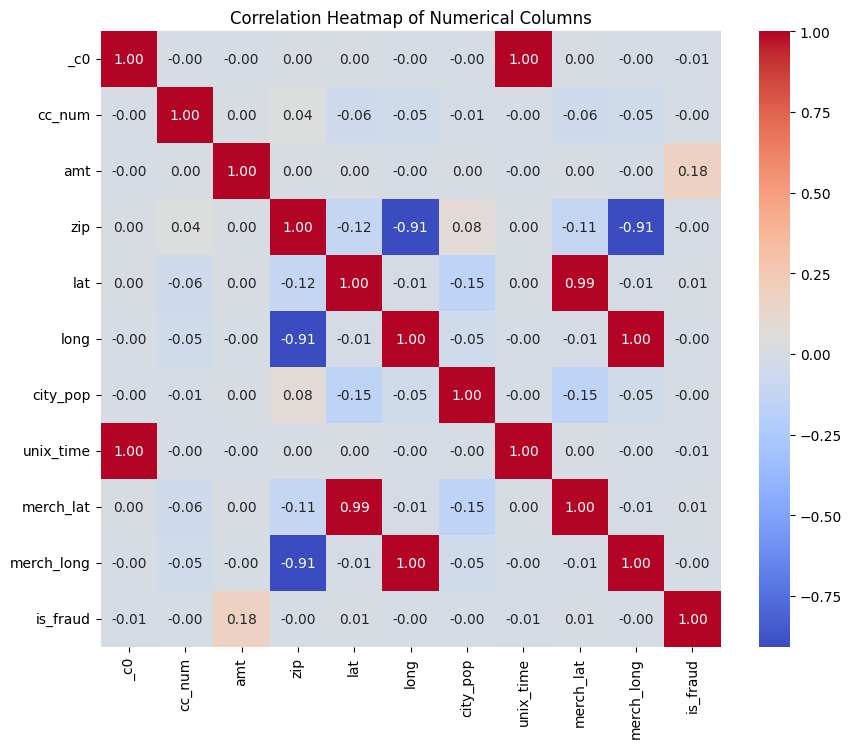

In [ ]:
import seaborn as sns

# Calculate correlation matrix
correlation_matrix = df.select(numerical_columns).toPandas().corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numerical Columns")
plt.show()

The following columns have high correlation according to heatmap:
- `_c0` and `unix_time`
- `lat` and `merch_lat`
- `long` and `merch_long`

The following columns have a positive correlation according to heatmap:
- `amt` and `is_fraud`

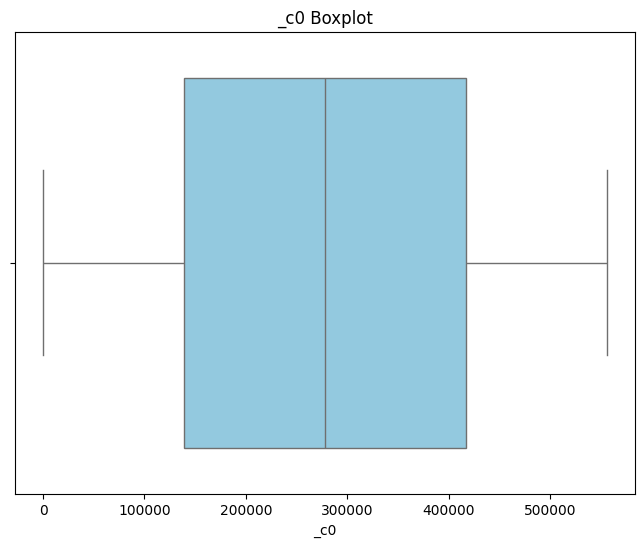

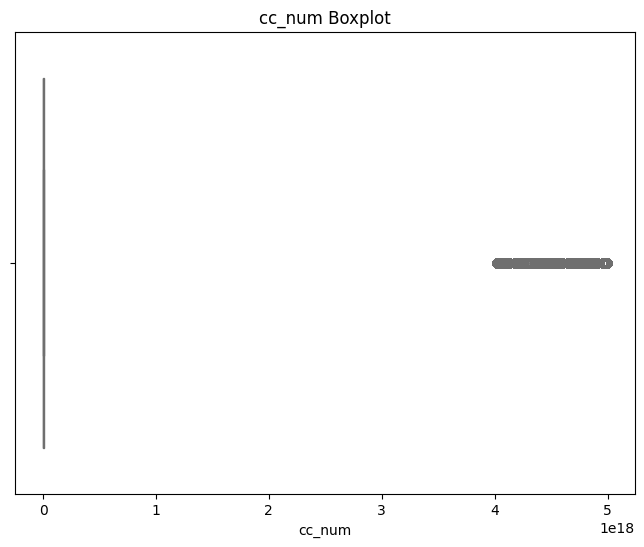

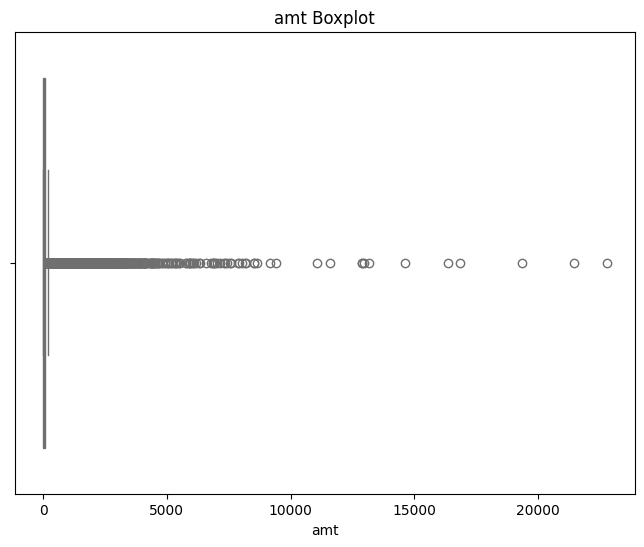

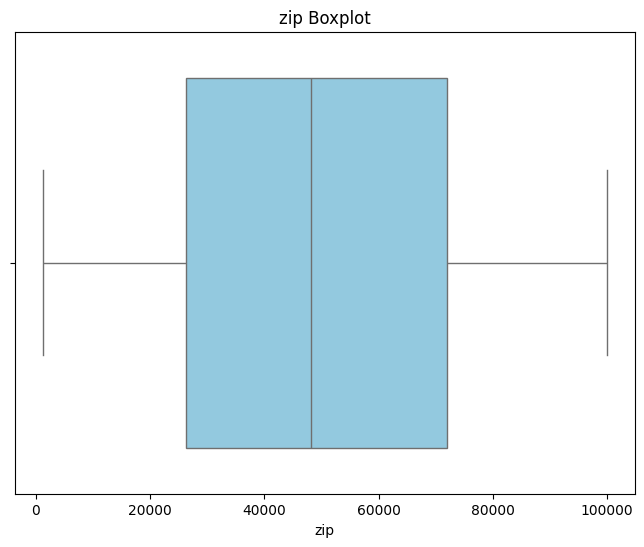

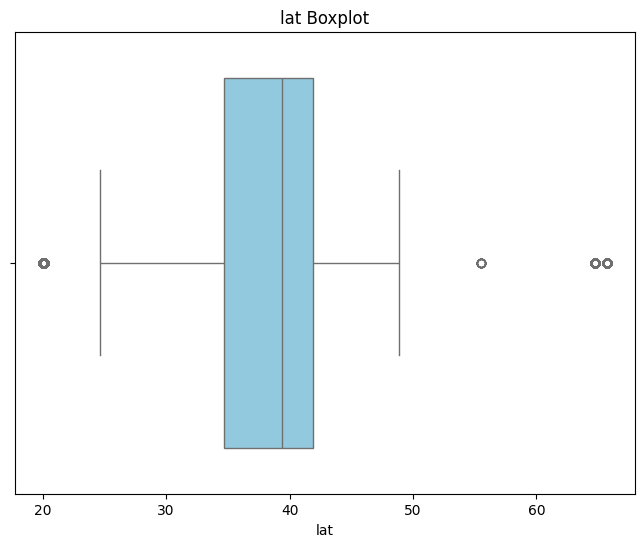

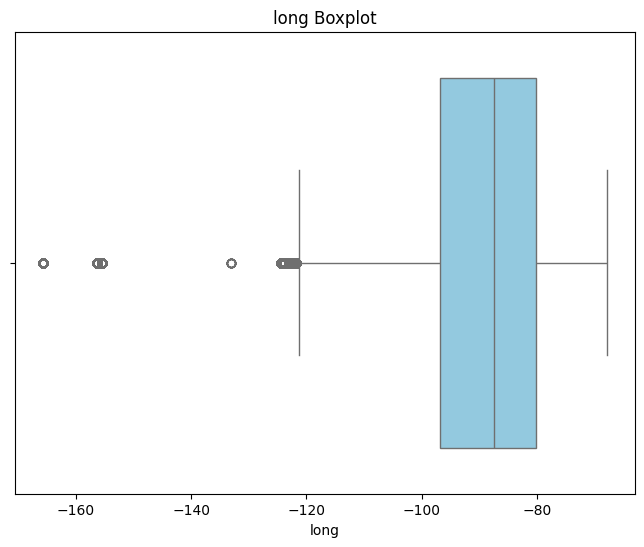

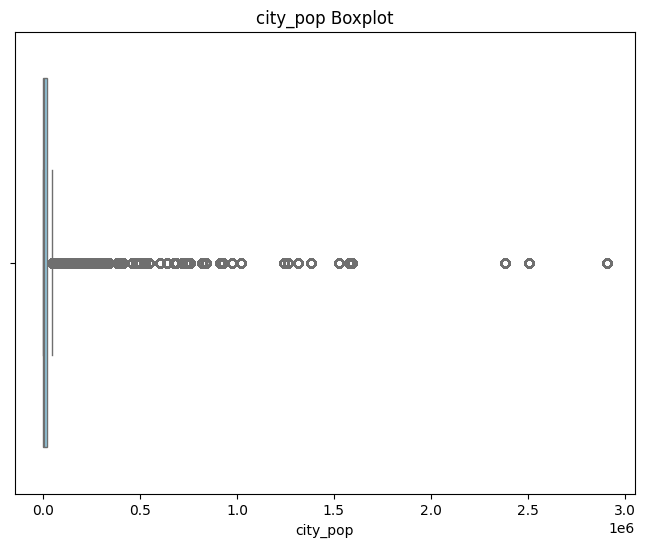

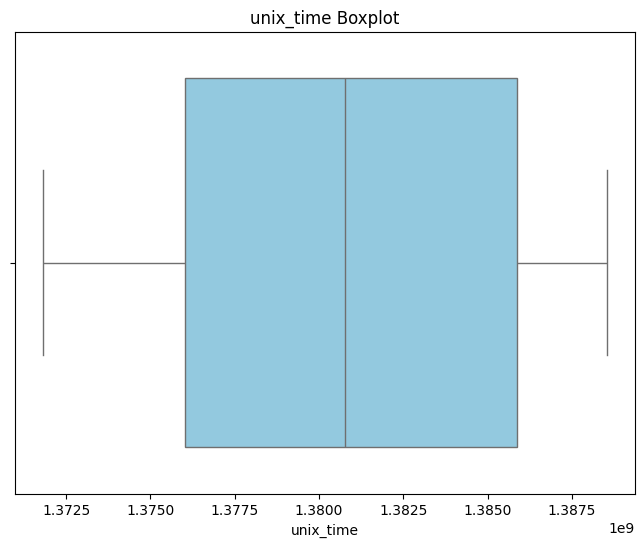

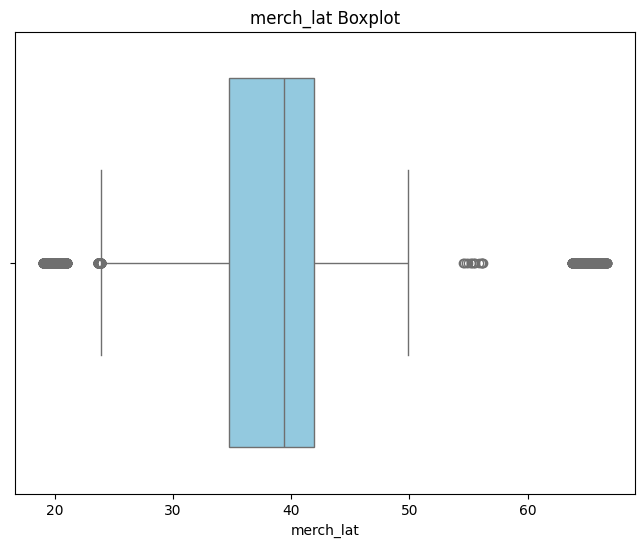

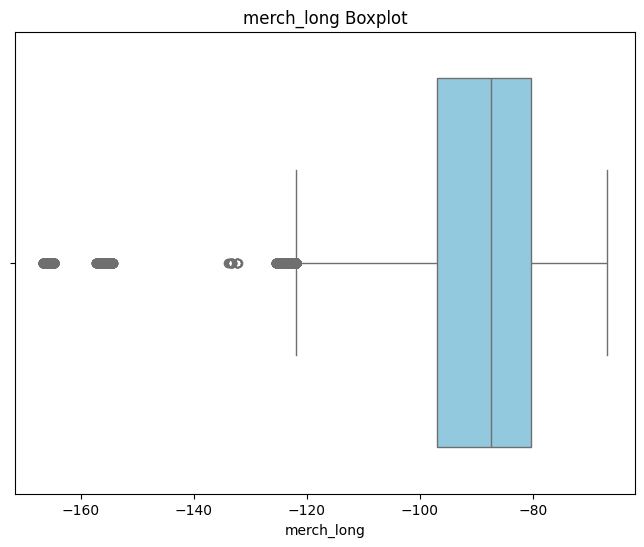

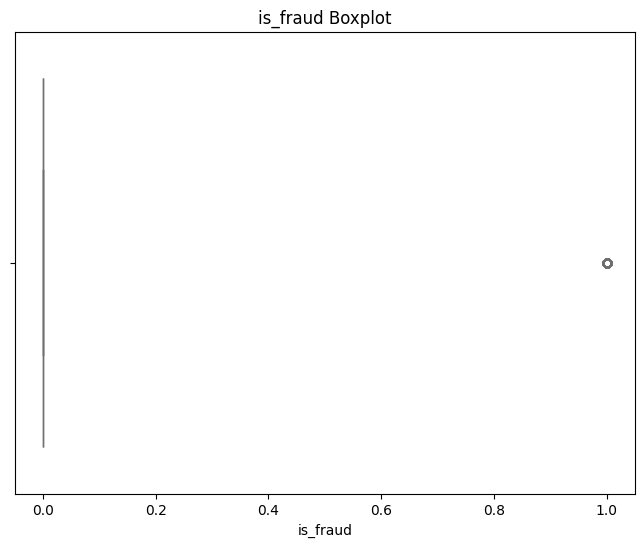

In [ ]:
# Iterate over numerical columns and plot boxplots
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df.toPandas(), color='skyblue')
    plt.title(col + " Boxplot")
    plt.xlabel(col)
    plt.show()

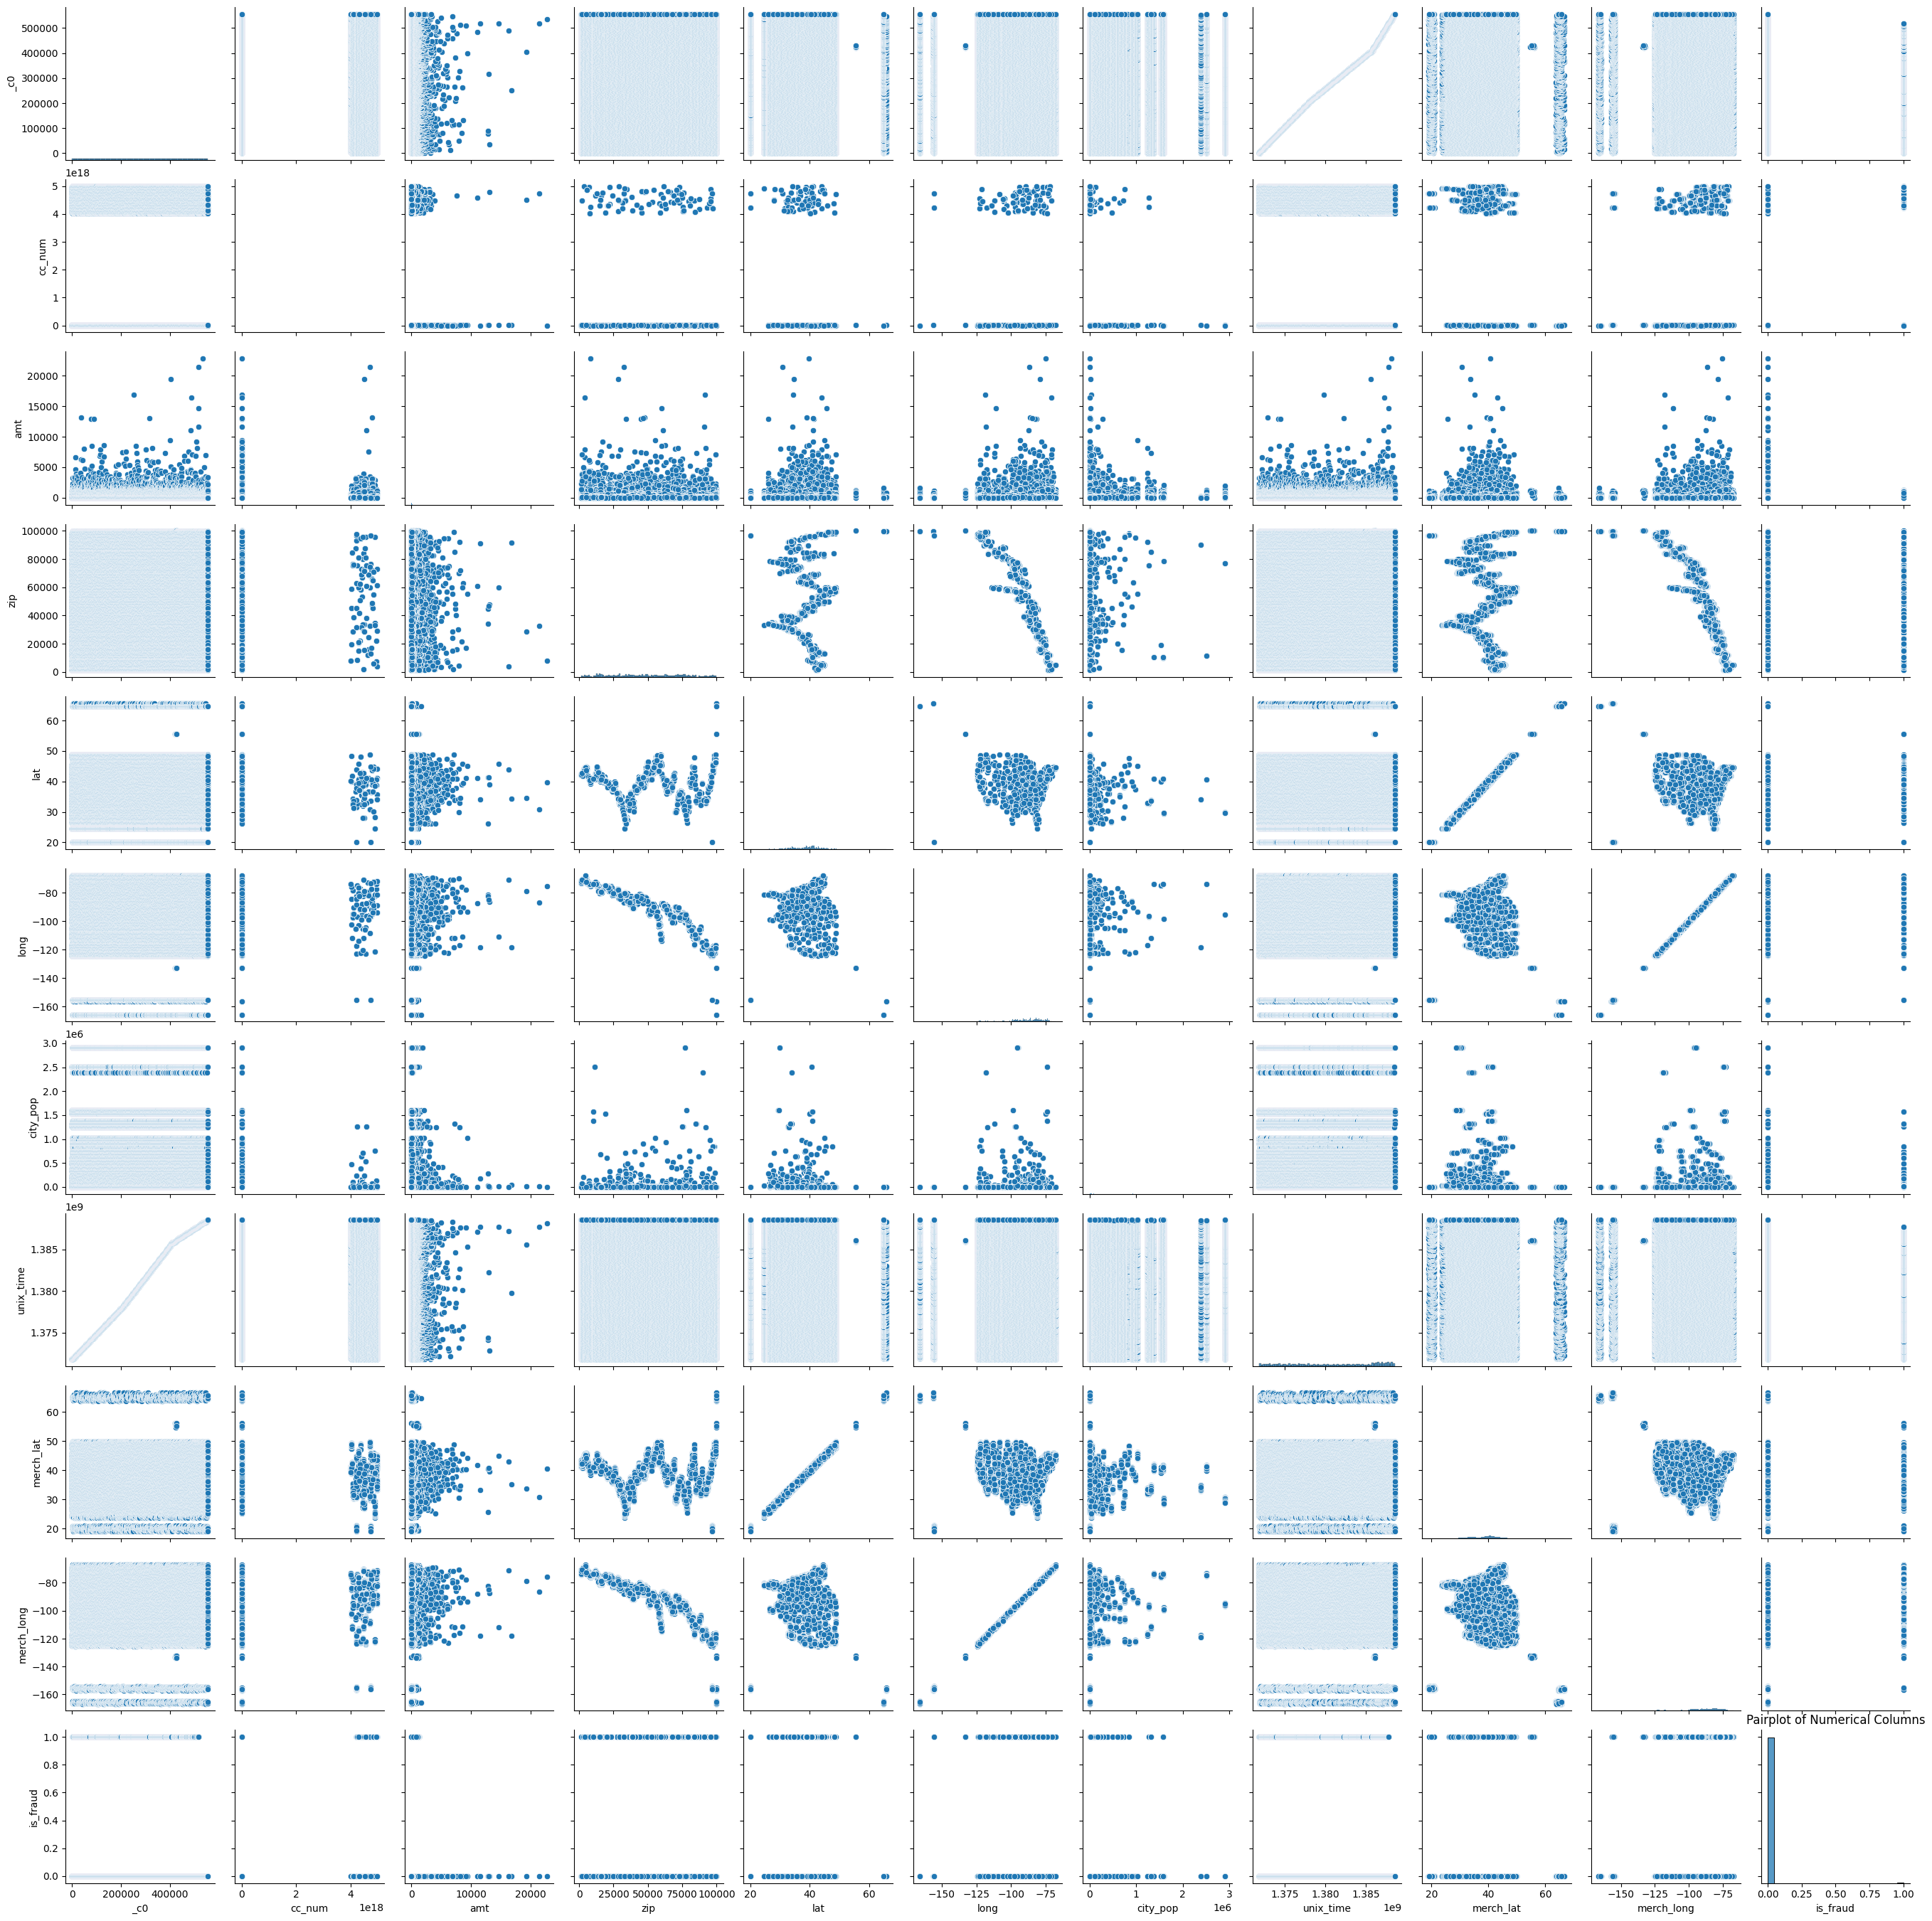

In [ ]:
# Plot pairplot
sns.pairplot(df.select(numerical_columns).toPandas())
plt.title("Pairplot of Numerical Columns")
plt.show()

Identify all outlier columns using Box Plots and Function. May need to perform Scaling in Future.

In [ ]:
# Define a function to detect outliers using IQR method
def detect_outliers(df, columns):
    outliers = {}
    for col in columns:
        quartiles = df.approxQuantile(col, [0.25, 0.75], 0.05)
        lower_fence = quartiles[0] - 1.5 * (quartiles[1] - quartiles[0])
        upper_fence = quartiles[1] + 1.5 * (quartiles[1] - quartiles[0])
        outliers[col] = df.filter((df[col] < lower_fence) | (df[col] > upper_fence)).count()
    return outliers

# Detect outliers in numerical columns
outliers = detect_outliers(df, numerical_columns)
print("Outliers:", outliers)

Outliers: {'_c0': 0, 'cc_num': 50982, 'amt': 33302, 'zip': 0, 'lat': 3004, 'long': 25731, 'city_pop': 119832, 'unix_time': 0, 'merch_lat': 2630, 'merch_long': 25777, 'is_fraud': 2145}


Identify Skewed Columns using Histogram Distributions and Function. May need to perform Log or Square Root Operations in Future.

In [ ]:
# Calculate skewness for numerical columns
skewness = {}
for col in numerical_columns:
    skewness[col] = df.agg(F.skewness(col)).collect()[0][0]
print("Skewness:", skewness)

Skewness: {'_c0': -7.141193914178828e-18, 'cc_num': 2.8491961977118967, 'amt': 37.13397660782412, 'zip': 0.07724580089350361, 'lat': -0.2060370885087709, 'long': -1.1394126687297483, 'city_pop': 5.583399535513947, 'unix_time': -0.07740517173865151, 'merch_lat': -0.20262555977324964, 'merch_long': -1.1368064787793488, 'is_fraud': 16.002510168631307}


Identify categorical columns to transform later to numeric using String Indexing. Transforming columns by techniques like hot encoding at a later stage. All Features will undergo scaling.

In [ ]:
categorical_columns = [col_name for col_name, col_type in df.dtypes if col_type == 'string']

# Print Categorical columns
print(categorical_columns)

['trans_date_trans_time', 'merchant', 'category', 'first', 'last', 'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']


## Preprocessing

In [ ]:
df

DataFrame[_c0: int, trans_date_trans_time: string, cc_num: double, merchant: string, category: string, amt: double, first: string, last: string, gender: string, street: string, city: string, state: string, zip: int, lat: double, long: double, city_pop: int, job: string, dob: string, trans_num: string, unix_time: int, merch_lat: double, merch_long: double, is_fraud: int]

In [ ]:
df.show(1)

+---+---------------------+----------+--------------------+-------------+----+-----+-------+------+-----------------+--------+-----+-----+-------+--------+--------+-------------------+----------+--------------------+----------+---------+----------+--------+
|_c0|trans_date_trans_time|    cc_num|            merchant|     category| amt|first|   last|gender|           street|    city|state|  zip|    lat|    long|city_pop|                job|       dob|           trans_num| unix_time|merch_lat|merch_long|is_fraud|
+---+---------------------+----------+--------------------+-------------+----+-----+-------+------+-----------------+--------+-----+-----+-------+--------+--------+-------------------+----------+--------------------+----------+---------+----------+--------+
|  0|     21/06/2020 12:14|2.29116E15|fraud_Kirlin and ...|personal_care|2.86| Jeff|Elliott|     M|351 Darlene Green|Columbia|   SC|29209|33.9659|-80.9355|  333497|Mechanical engineer|19/03/1968|2da90c7d74bd46a0c...|1371816865

### Creating New Feautures

Additional Explainations available in the Report.

In [ ]:
from pyspark.sql.functions import to_timestamp, col

# Assuming df is your DataFrame and 'trans_date_trans_time' is the column name
df = df.withColumn("Datetime", to_timestamp("trans_date_trans_time", "dd/MM/yyyy HH:mm"))

In [ ]:
from pyspark.sql.functions import dayofweek

df = df.withColumn("DayOfWeek", dayofweek("Datetime"))

In [ ]:
from pyspark.sql.functions import when

df = df.withColumn("is_weekend", when(col("DayOfWeek") >= 6, 1).otherwise(0))

In [ ]:
from pyspark.sql.functions import hour

df = df.withColumn("Hour", hour("Datetime"))

df = df.withColumn("time_of_day",
                   when(col("Hour") < 6, "Night")
                   .when(col("Hour") < 12, "Morning")
                   .when(col("Hour") < 18, "Afternoon")
                   .otherwise("Evening"))

In [ ]:
df.show(1)

+---+---------------------+----------+--------------------+-------------+----+-----+-------+------+-----------------+--------+-----+-----+-------+--------+--------+-------------------+----------+--------------------+----------+---------+----------+--------+-------------------+---------+----------+----+-----------+
|_c0|trans_date_trans_time|    cc_num|            merchant|     category| amt|first|   last|gender|           street|    city|state|  zip|    lat|    long|city_pop|                job|       dob|           trans_num| unix_time|merch_lat|merch_long|is_fraud|           Datetime|DayOfWeek|is_weekend|Hour|time_of_day|
+---+---------------------+----------+--------------------+-------------+----+-----+-------+------+-----------------+--------+-----+-----+-------+--------+--------+-------------------+----------+--------------------+----------+---------+----------+--------+-------------------+---------+----------+----+-----------+
|  0|     21/06/2020 12:14|2.29116E15|fraud_Kirlin a

In [ ]:
from pyspark.sql.functions import radians, cos, sin, sqrt, asin, round

def haversine(lon1, lat1, lon2, lat2):
    # Convert decimal degrees to radians
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a))
    km = 6371 * c
    return km

df = df.withColumn("distance_km", haversine(df["long"], df["lat"], df["merch_long"], df["merch_lat"]))
df = df.withColumn("distance_km", round(df["distance_km"], 2))

In [ ]:
df.show(1)

+---+---------------------+----------+--------------------+-------------+----+-----+-------+------+-----------------+--------+-----+-----+-------+--------+--------+-------------------+----------+--------------------+----------+---------+----------+--------+-------------------+---------+----------+----+-----------+-----------+
|_c0|trans_date_trans_time|    cc_num|            merchant|     category| amt|first|   last|gender|           street|    city|state|  zip|    lat|    long|city_pop|                job|       dob|           trans_num| unix_time|merch_lat|merch_long|is_fraud|           Datetime|DayOfWeek|is_weekend|Hour|time_of_day|distance_km|
+---+---------------------+----------+--------------------+-------------+----+-----+-------+------+-----------------+--------+-----+-----+-------+--------+--------+-------------------+----------+--------------------+----------+---------+----------+--------+-------------------+---------+----------+----+-----------+-----------+
|  0|     21/06/

### Dropping Unneccessary Columns for Training our Models

Logic for which columns were dropped is explained in the report.

In [ ]:
# Droping rows we don't need for the models
df = df.drop('cc_num', 'first', 'last', 'zip', 'trans_num', 'dob','lat','long','city','trans_date_trans_time','gender','street','city_pop','merch_lat','merch_long','Datetime','DayOfWeek','Hour','unix_time','_c0')

In [ ]:
df.show(1)

+--------------------+-------------+----+-----+-------------------+--------+----------+-----------+-----------+
|            merchant|     category| amt|state|                job|is_fraud|is_weekend|time_of_day|distance_km|
+--------------------+-------------+----+-----+-------------------+--------+----------+-----------+-----------+
|fraud_Kirlin and ...|personal_care|2.86|   SC|Mechanical engineer|       0|         0|  Afternoon|      24.56|
+--------------------+-------------+----+-----+-------------------+--------+----------+-----------+-----------+
only showing top 1 row



### Performing Undersampling on the dataset for model training

In [ ]:
fraud_df = df.filter(col("is_fraud") == 1)
fraud_count = fraud_df.count()
non_fraud_df = df.filter(col("is_fraud") == 0)

# Perform undersampling
sampled_non_fraud_df = non_fraud_df.sample(withReplacement=False, fraction=fraud_count / non_fraud_df.count(), seed=42).limit(fraud_count)

# Combine the datasets to form a balanced DataFrame
balanced_df = fraud_df.unionAll(sampled_non_fraud_df)

In [ ]:
# Group by the 'Class' column and count occurrences
class_counts_b = balanced_df.groupBy('is_fraud').count()

# Convert the result to Pandas DataFrame for easy display (optional)
class_counts_b = class_counts_b.toPandas()

# Print the result
print(class_counts_b)

   is_fraud  count
0         1   2145
1         0   2145


### String Indexing, Hot Encoding, and Vector Assembling of Features into 1 Vector
Scaling All Features.
Creating a Transformation Pipeline.

In [ ]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler, StandardScaler
from pyspark.ml import Pipeline



# Define the numeric and categorical features (as column names)
numeric_features = ['amt', 'distance_km']
categorical_features = ['merchant', 'category', 'state', 'time_of_day']

# Create indexers for categorical features
indexers = [StringIndexer(inputCol=col, outputCol=col + "_index", handleInvalid="keep") for col in categorical_features]

# Create one-hot encoders for categorical features
encoders = [OneHotEncoder(inputCols=[col + "_index"], outputCols=[col + "_encoded"]) for col in categorical_features]

# Assemble all features into a single vector
assembler = VectorAssembler(inputCols=[col + "_encoded" for col in categorical_features] + numeric_features,
                            outputCol="raw_features")

# Scale features
scaler = StandardScaler(inputCol="raw_features", outputCol="features", withStd=True, withMean=False)

# Create a pipeline to chain indexers, encoders, assembler, and scaler
transformation_pipeline = Pipeline(stages=indexers + encoders + [assembler, scaler])

# Fit and transform the data using the transformation pipeline
#transformed_model = transformation_pipeline.fit(df)
#transformed = transformed_model.transform(df)
transformed_model_b = transformation_pipeline.fit(balanced_df)
b_transformed = transformed_model_b.transform(balanced_df)

## Splitting into test and training set

In [ ]:
# Split the transformed data into training and testing sets
#train_data, test_data = df_transformed.randomSplit([0.8, 0.2], seed=42)
train_data, test_data = b_transformed.randomSplit([0.8, 0.2], seed=42)

# Calculate balance ratio for weighting the classes in logistic regression
#balance_ratio = train_data.filter(col("is_fraud") == 0).count() / train_data.filter(col("is_fraud") == 1).count()

## Perceptron

In [ ]:
from pyspark.ml.classification import MultilayerPerceptronClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator, BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType

# Define the architecture for the Multilayer Perceptron
input_layer_size = len(train_data.select("features").first()[0])
output_layer_size = 2  # Binary classification
layers = [input_layer_size, 5, output_layer_size]

# Initialise the MLP classifier
mlp = MultilayerPerceptronClassifier(layers=layers, seed=1234, maxIter=100, featuresCol="features", labelCol="is_fraud")

# Train the MLP model on the training data
mlp_model = mlp.fit(train_data)

# Make predictions on both the training and test datasets
train_predictions_mlp = mlp_model.transform(train_data)
test_predictions_mlp = mlp_model.transform(test_data)

# Cast the prediction and is_fraud columns to DoubleType for compatibility with MulticlassMetrics
train_predictions_mlp = train_predictions_mlp.withColumn("prediction", col("prediction").cast(DoubleType()))
train_predictions_mlp = train_predictions_mlp.withColumn("is_fraud", col("is_fraud").cast(DoubleType()))
test_predictions_mlp = test_predictions_mlp.withColumn("prediction", col("prediction").cast(DoubleType()))
test_predictions_mlp = test_predictions_mlp.withColumn("is_fraud", col("is_fraud").cast(DoubleType()))

# Initialise the BinaryClassificationEvaluator for AUC
evaluator_auc_mlp = BinaryClassificationEvaluator(labelCol="is_fraud", metricName="areaUnderROC")

# Compute AUC
train_auc_mlp = evaluator_auc_mlp.evaluate(train_predictions_mlp)
test_auc_mlp = evaluator_auc_mlp.evaluate(test_predictions_mlp)
print(f"MLP Training Set AUC: {train_auc_mlp}")
print(f"MLP Test Set AUC: {test_auc_mlp}")

# Additional evaluation metrics using MulticlassMetrics
predictionAndLabelsTrain_mlp = train_predictions_mlp.select("prediction", "is_fraud").rdd.map(lambda row: (float(row[0]), float(row[1])))
predictionAndLabelsTest_mlp = test_predictions_mlp.select("prediction", "is_fraud").rdd.map(lambda row: (float(row[0]), float(row[1])))

metrics_train_mlp = MulticlassMetrics(predictionAndLabelsTrain_mlp)
metrics_test_mlp = MulticlassMetrics(predictionAndLabelsTest_mlp)

# Compute precision, recall, and F1-score
precision_train_mlp = metrics_train_mlp.precision(1)
recall_train_mlp = metrics_train_mlp.recall(1)
f1_score_train_mlp = metrics_train_mlp.fMeasure(1.0)
precision_test_mlp = metrics_test_mlp.precision(1)
recall_test_mlp = metrics_test_mlp.recall(1)
f1_score_test_mlp = metrics_test_mlp.fMeasure(1.0)

# Print all the metrics
print("MLP Training Precision:", precision_train_mlp)
print("MLP Training Recall:", recall_train_mlp)
print("MLP Training F1-Score:", f1_score_train_mlp)
print("MLP Testing Precision:", precision_test_mlp)
print("MLP Testing Recall:", recall_test_mlp)
print("MLP Testing F1-Score:", f1_score_test_mlp)

MLP Training Set AUC: 0.9970336542004112
MLP Test Set AUC: 0.878253104024428
MLP Training Precision: 0.9815455594002307
MLP Training Recall: 0.9747995418098511
MLP Training F1-Score: 0.9781609195402298
MLP Testing Precision: 0.7580645161290323
MLP Testing Recall: 0.8245614035087719
MLP Testing F1-Score: 0.7899159663865545


## LogisticRegression

In [ ]:
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col
from pyspark.sql.types import DoubleType



# Apply the balance ratio as weight for the positive class
#train_data = train_data.withColumn("classWeight", when(col("is_fraud") == 1, balance_ratio).otherwise(1))


# Prepare logistic regression model with class weights
#lr = LogisticRegression(featuresCol="features", labelCol="is_fraud", weightCol="classWeight")
lr = LogisticRegression(featuresCol="features", labelCol="is_fraud")
# Train the logistic regression model
lr_model = lr.fit(train_data)

# Make predictions on the training and test data
train_predictions = lr_model.transform(train_data)
test_predictions = lr_model.transform(test_data)

# Cast the prediction and is_fraud columns to DoubleType
train_predictions = train_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))
train_predictions = train_predictions.withColumn("is_fraud", col("is_fraud").cast(DoubleType()))
test_predictions = test_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))
test_predictions = test_predictions.withColumn("is_fraud", col("is_fraud").cast(DoubleType()))

# Evaluate the model on both training and test sets
evaluator = BinaryClassificationEvaluator(labelCol="is_fraud", metricName="areaUnderROC")
evaluator2 = MulticlassClassificationEvaluator(
    labelCol="is_fraud",
    predictionCol="prediction",
    metricName="accuracy"
)

precision = evaluator2.evaluate(test_predictions)
print("Model accuracy:", precision)

# Compute AUC
auc_train = evaluator.evaluate(train_predictions)
auc_test = evaluator.evaluate(test_predictions)

print("Training AUC:", auc_train)
print("Testing AUC:", auc_test)

# Additional evaluation metrics
metrics_train = MulticlassMetrics(train_predictions.select("prediction", "is_fraud").rdd)
metrics_test = MulticlassMetrics(test_predictions.select("prediction", "is_fraud").rdd)

precision_train = metrics_train.precision(1)
recall_train = metrics_train.recall(1)
f1_score_train = metrics_train.fMeasure(1.0)
precision_test = metrics_test.precision(1)
recall_test = metrics_test.recall(1)
f1_score_test = metrics_test.fMeasure(1.0)

print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1-Score:", f1_score_train)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1-Score:", f1_score_test)

Model accuracy: 0.8033573141486811
Training AUC: 0.9703176182150692
Testing AUC: 0.8480799700400421


/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:158: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


Training Precision: 0.9021864211737629
Training Recall: 0.8980526918671249
Training F1-Score: 0.9001148105625718
Testing Precision: 0.7790973871733967
Testing Recall: 0.8220551378446115
Testing F1-Score: 0.8


## Random Forest

In [ ]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.evaluation import BinaryClassificationEvaluator, MulticlassClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.sql.functions import col, when
from pyspark.sql.types import DoubleType

#train_datarf = train_data.withColumn("classWeight", when(col("is_fraud") == 1, balance_ratio).otherwise(1))
# Prepare the Random Forest Classifier with the classWeight column
#rf = RandomForestClassifier(featuresCol="features", labelCol="is_fraud", weightCol="classWeight",
                            #numTrees=100, maxDepth=10, seed=42)
rf = RandomForestClassifier(featuresCol="features", labelCol="is_fraud",
                            numTrees=100, maxDepth=10, seed=42)

# Train the Random Forest model
#rf_model = rf.fit(train_datarf)
rf_model = rf.fit(train_data)

# Make predictions on the training and test data
#train_predictions = rf_model.transform(train_datarf)
train_predictions = rf_model.transform(train_data)
test_predictions = rf_model.transform(test_data)

# Cast the prediction and is_fraud columns to DoubleType for compatibility with MulticlassMetrics
train_predictions = train_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))
test_predictions = test_predictions.withColumn("prediction", col("prediction").cast(DoubleType()))
train_predictions = train_predictions.withColumn("is_fraud", col("is_fraud").cast(DoubleType()))
test_predictions = test_predictions.withColumn("is_fraud", col("is_fraud").cast(DoubleType()))

# Evaluate the model
evaluator = BinaryClassificationEvaluator(labelCol="is_fraud", metricName="areaUnderROC")
auc_train = evaluator.evaluate(train_predictions)
auc_test = evaluator.evaluate(test_predictions)

print("Training AUC:", auc_train)
print("Testing AUC:", auc_test)

# Additional evaluation metrics using MulticlassMetrics
metrics_train = MulticlassMetrics(train_predictions.select("prediction", "is_fraud").rdd)
metrics_test = MulticlassMetrics(test_predictions.select("prediction", "is_fraud").rdd)

precision_train = metrics_train.precision(1)
recall_train = metrics_train.recall(1)
f1_score_train = metrics_train.fMeasure(1.0)
precision_test = metrics_test.precision(1)
recall_test = metrics_test.recall(1)
f1_score_test = metrics_test.fMeasure(1.0)

print("Training Precision:", precision_train)
print("Training Recall:", recall_train)
print("Training F1-Score:", f1_score_train)
print("Testing Precision:", precision_test)
print("Testing Recall:", recall_test)
print("Testing F1-Score:", f1_score_test)



Training AUC: 0.9509510459998777
Testing AUC: 0.942064932446057
Training Precision: 0.9570051890289103
Training Recall: 0.7394043528064147
Training F1-Score: 0.834248788368336
Testing Precision: 0.9292307692307692
Testing Recall: 0.7568922305764411
Testing F1-Score: 0.8342541436464088


## Conclusion

The Perceptron was chosen as the Final model for our project due to marginally higher Testing Recall, which is critical in minimising the risk of missing fraudulent transactions.